In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import All Libraries

In [2]:
#!pip install /kaggle/input/textsearch/textsearch-0.0.24-py2.py3-none-any.whl

In [3]:
#!pip install contractions #/kaggle/input/contractions-file/contractions-0.1.73-py2.py3-none-any.whl
#!pip install /kaggle/input/contractions-file/contractions-0.1.73-py2.py3-none-any.whl

In [4]:
#!pip install unidecode
!pip install unidecode /kaggle/input/unidecode-file/Unidecode-1.3.7-py3-none-any.whl

Processing /kaggle/input/unidecode-file/Unidecode-1.3.7-py3-none-any.whl
  Attempting uninstall: Unidecode
    Found existing installation: Unidecode 1.3.6
    Uninstalling Unidecode-1.3.6:
      Successfully uninstalled Unidecode-1.3.6


In [5]:
#!pip install pycontractions

In [6]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.tokenize.treebank import TreebankWordDetokenizer

# nltk.download('stopwords')
# nltk.download('punkt')


In [7]:
# import nltk
# from nltk.stem import WordNetLemmatizer
# nltk.download("wordnet")
# nltk.download("omw-1.4") 

In [8]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [10]:
# Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from unidecode import unidecode
from string import punctuation


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


from wordcloud import WordCloud


from tqdm import tqdm
tqdm.pandas()


import warnings
warnings.filterwarnings("ignore")

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, SimpleRNN, LSTM , Bidirectional, Embedding
from keras.layers import Dropout

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

## Load Data

In [13]:
train_essay = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/train_essays.csv")
train_essay 

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [14]:
test_essay = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/test_essays.csv")
test_essay

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [15]:
sample_sub = pd.read_csv("/kaggle/input/llm-detect-ai-generated-text/sample_submission.csv")
sample_sub

,id,generated
0,0000aaaa,0.1
1,1111bbbb,0.9
2,2222cccc,0.4


## Data Analysis

In [16]:
train_essay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378 entries, 0 to 1377
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1378 non-null   object
 1   prompt_id  1378 non-null   int64 
 2   text       1378 non-null   object
 3   generated  1378 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 43.2+ KB


In [17]:
train_essay['prompt_id'].value_counts()

prompt_id
0    708
1    670
Name: count, dtype: int64

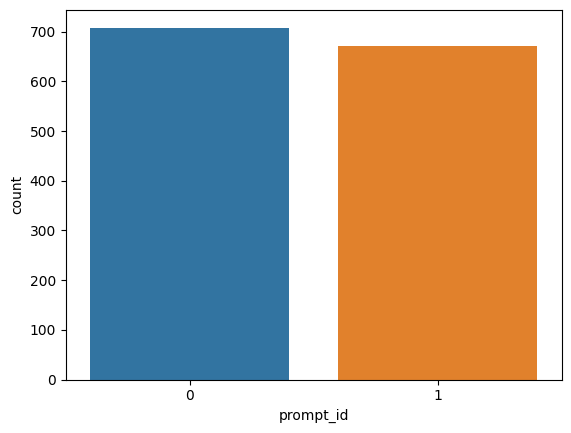

In [18]:
sns.countplot(x=train_essay['prompt_id'])
plt.show()

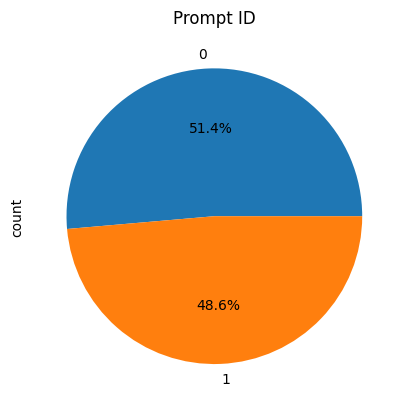

In [19]:
train_essay['prompt_id'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Prompt ID")
plt.show()

## Target Label

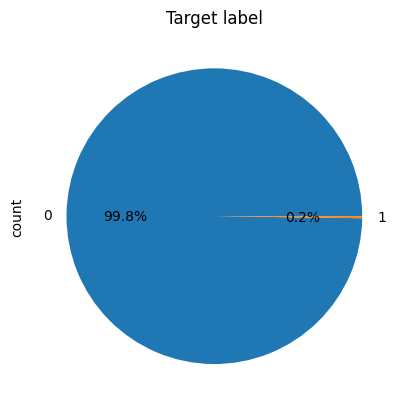

In [20]:
train_essay['generated'].value_counts().plot(kind="pie",autopct="%.1f%%")
plt.title("Target label")
plt.show()

In [21]:
train_essay.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


In [22]:
ai_df = train_essay[train_essay['generated']==1]
ai_df

,id,prompt_id,text,generated
704,82131f68,1,"This essay will analyze, discuss and prove one...",1
740,86fe4f18,1,I strongly believe that the Electoral College ...,1
1262,eafb8a56,0,"Limiting car use causes pollution, increases c...",1


In [23]:
train_essay

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


# Generated Text

## Data Pre-processing

In [24]:
stopwords_text = """"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"
"""
stopwords_list = stopwords_text.split()

In [25]:
len(stopwords_list)

176

In [26]:
ai_essay = pd.read_csv("/kaggle/input/ai-generated-text/daigt_external_dataset.csv")
ai_essay

,id,text,instructions,source_text
0,6060D28C05B6,Some schools in United States ofter classes fr...,\nTask: Write a persuasive essay on whether or...,\nWhen considering the pros and cons of attend...
1,60623DB5DE7A,"Four-day work week, a remarkable idea to conse...",\nTask: Research the advantages and disadvanta...,\nOne of the primary arguments for implementin...
2,607A39D981DE,Students and their families should consider an...,\nTask: \n\n1. Talk to your parents before tak...,\nBefore making any decisions about getting in...
3,60ACDFA1609E,Agree you will never grow if something beyond ...,\nTask: Write an essay discussing the benefits...,"\nRalph Waldo Emerson once said, ""Go confident..."
4,60AE13D3F07B,I think our character traits are formed by inf...,\nTask: Research and discuss how character tra...,\nHuman character traits are shaped by a wide ...
...,...,...,...,...
2416,F5FF5E9E553C,"On september 2, 2015 Generic_Name was entering...",\nTask: Research different kinds of medical pr...,\nBecoming a surgeon requires a great deal of ...
2417,F60545D8271E,I think that schools must have a after school ...,\nTask: Write an essay discussing why schools ...,\nSchools should offer an after school homewor...
2418,F610B3CBF3DF,"Winston Churchill once said ""success consists ...",\nTask: Write an essay about how having a few ...,\nIt’s human nature to be afraid to make mista...
2419,F610C7BCD9EC,Technology seems to be becoming more and more ...,\nTask: \n\nWrite an essay exploring the pros ...,\nOne of the main debates of 2020 for many stu...


In [27]:
ai_essay_data = ai_essay[['source_text']]
ai_essay_data['generated'] = [1]*len(ai_essay_data)

In [28]:
ai_essay_data_1 = ai_essay_data.sample(1400)

In [29]:
ai_essay_data_1.columns=['text', 'generated']

In [30]:
df = train_essay[['text','generated']]
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [31]:
data = pd.concat([df,ai_essay_data_1],axis=0,ignore_index=True)
data

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0
...,...,...
2773,\nMy goal is to become a successful entreprene...,1
2774,"\nAs part of my research, I have identified se...",1
2775,"\nAs human beings, we all face pressures from ...",1
2776,\nDropping out of school can be a difficult de...,1


In [32]:
data.generated.value_counts()

generated
1    1403
0    1375
Name: count, dtype: int64

In [33]:
def remove_blank(data):
    formated_text = data.replace("\\n"," ").replace("\t"," ")
    return formated_text


def handle_accented(data):
    fixed_text = unidecode(data)
    return fixed_text


def clean_text(data):
    tokens = word_tokenize(data)
    text=[i.lower() for i in tokens if (i.lower() not in punctuation) and (i.lower() not in stopwords_list) and (len(i)>2) and (i.isalpha())]
    return text


def lemmatization(data):
    lemma = WordNetLemmatizer()
    final_text = []
    for i in data:
        lemma_word = lemma.lemmatize(i)
        final_text.append(lemma_word)
    return " ".join(final_text)

## Data Split for train and test purpose for base model

In [36]:
x_train,x_test,y_train,y_test=train_test_split(data.text, data.generated,test_size=0.02,shuffle=True)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2722,)
(56,)
(2722,)
(56,)


In [37]:
x_train

1076    In my opinion, I think that the Electoral Coll...
846     Believe it or not there are ways people may be...
1837    \nFailure is an important part of the pursuit ...
1973    \nOnline classes can offer a unique learning o...
665     To you, a car may mean no more than just getti...
                              ...                        
1556    \nMy goal is to learn to code in Python. To ac...
108     Dear Senator Adams, Voting for a president is ...
2683    \nGraduating early from high school and workin...
695     Advantages of limiting car usage? Is that even...
1095    People all over the world are saying goodbye t...
Name: text, Length: 2722, dtype: object

In [38]:
clean_train = x_train.apply(remove_blank)
clean_test = x_test.apply(remove_blank)

clean_train = clean_train.apply(handle_accented)
clean_test = clean_test.apply(handle_accented)

clean_train = clean_train.apply(clean_text)
clean_test = clean_test.apply(clean_text)

clean_train = clean_train.apply(lemmatization)
clean_test = clean_test.apply(lemmatization)

In [39]:
clean_train

1076    opinion think electoral college method abolish...
846     believe not way people may harming environment...
1837    failure important part pursuit success indeed ...
1973    online class offer unique learning opportunity...
665     car may mean getting point point car play much...
                              ...                        
1556    goal learn code python achieve decided break g...
108     dear senator adam voting president not seems e...
2683    graduating early high school working year coll...
695     advantage limiting car usage even possible yes...
1095    people world saying goodbye car saying hello d...
Name: text, Length: 2722, dtype: object

In [40]:
clean_test

250     dear senator florida year old concerned citize...
1414    technology become integral part everyday life ...
2240    working group range benefit compared working a...
2591    implementation school week conservation energy...
1475    recent year use online video conferencing faci...
2092    considering importance knowledge imagination l...
1308    city vauban paris bogota people getting seriou...
1258    car usage decreasing world quickly many people...
1983    one greatest aspect human condition capacity i...
2100    traveling world always dream mine said three p...
421     dear senate believe change electoral college e...
2427    student begin develop sense individual identit...
1589    today world online class becoming increasingly...
1512    spending time together engaging activity party...
1578    many people believe positive attitude key life...
644     dear state senator researching electoral colle...
212     hao nearly two centurieo oince country wao bor...
1645    study 

## WordCloud

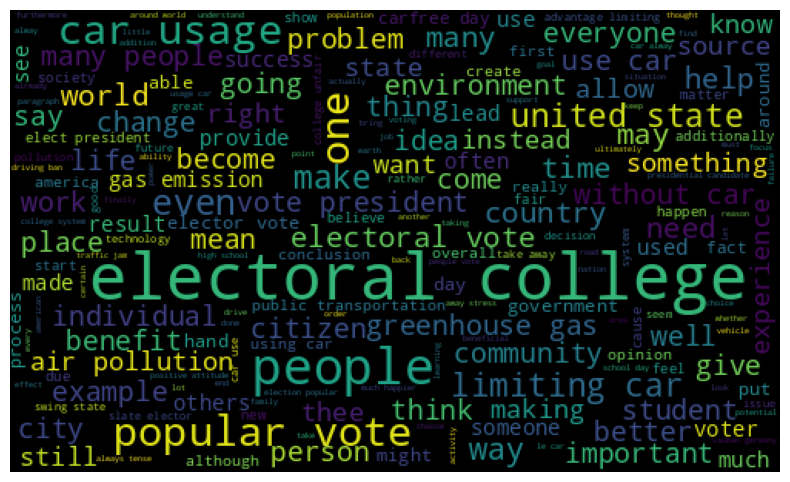

In [41]:
# wordcloud for train data
str_text=clean_train.str.cat(sep=" ")    # we have to convert all review into single string
wordcloud=WordCloud(width=500,height=300).generate(str_text)
plt.figure(figsize=(10,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

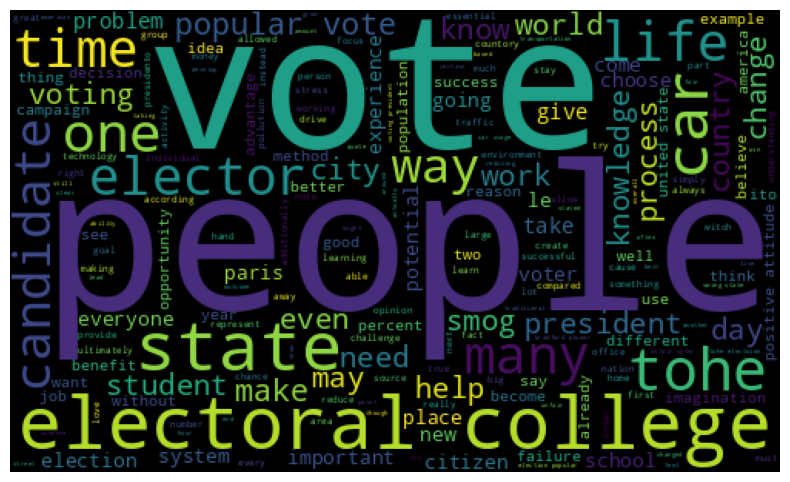

In [42]:
# wordcloud for train data
str_text = clean_test.str.cat(sep=" ")    # we have to convert all review into single string
wordcloud = WordCloud(width=500, height=300).generate(str_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Word Embedding

In [43]:
x_train_list = clean_train.to_list()
x_test_list = clean_test.to_list()
max_words = 5000
tk = Tokenizer(num_words=max_words, oov_token="##oov##")
tk.fit_on_texts(x_train_list)

x_train_seq = tk.texts_to_sequences(x_train_list)
x_test_seq = tk.texts_to_sequences(x_test_list)

In [44]:
len(x_train_seq)

2722

In [45]:
vocab_size = len(tk.word_index) + 1
vocab_size

17063

In [46]:
len(tk.word_index)

17062

In [47]:
lst = []
for i in range(0, len(x_train_seq)):
    a = len(x_train_seq[i])
    lst.append(a)

print("Max len of sent:",max(lst))
print("Min len of sent:",min(lst))

Max len of sent: 701
Min len of sent: 31


In [48]:
max_len_per_sent = 600
x_train_seq1 = pad_sequences(x_train_seq, maxlen=max_len_per_sent, padding="post", truncating="post")
x_test_seq1 = pad_sequences(x_test_seq, maxlen=max_len_per_sent, padding="post", truncating="post")

In [49]:
x_train_seq1

array([[236,  77,   5, ...,   0,   0,   0],
       [141,   6,  16, ...,   0,   0,   0],
       [174,  60, 144, ...,   0,   0,   0],
       ...,
       [887, 469, 195, ...,   0,   0,   0],
       [ 56,  47,   2, ...,   0,   0,   0],
       [  4,  37, 610, ...,   0,   0,   0]], dtype=int32)

In [50]:
print(x_train_seq1.shape)
print(x_test_seq1.shape)

(2722, 600)
(56, 600)


In [51]:
y_train

1076    0
846     0
1837    1
1973    1
665     0
       ..
1556    1
108     0
2683    1
695     0
1095    0
Name: generated, Length: 2722, dtype: int64

## Build Model

In [52]:
max_len_per_sent = 600
vocab_size = 137759

model = Sequential()
model.add(Embedding(input_dim = 5001 , output_dim = 500 , input_length = max_len_per_sent))
model.add(SimpleRNN(units=100 , return_sequences=False))

model.add(Dense(units=100 , activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

In [53]:
history = model.fit(x_train_seq1 , y_train , epochs=5 ,
          batch_size=64, validation_data=(x_test_seq1 , y_test))

In [54]:
loss , acc = model.evaluate(x_test_seq1, y_test)
print("Loss on test data is:",loss)
print("Accuracy on test data:",acc)

In [56]:
history1 = model1.fit(x_train_seq1 , y_train , epochs=5 ,
          batch_size=64, validation_data=(x_test_seq1 , y_test))

Epoch 1/5
43/43 [==============================] - 51s 1s/step - loss: 0.6944 - accuracy: 0.4930 - val_loss: 0.6941 - val_accuracy: 0.4286
Epoch 2/5
43/43 [==============================] - 47s 1s/step - loss: 0.6935 - accuracy: 0.5011 - val_loss: 0.6893 - val_accuracy: 0.5893
Epoch 3/5
43/43 [==============================] - 47s 1s/step - loss: 0.6925 - accuracy: 0.5114 - val_loss: 0.6835 - val_accuracy: 0.4286
Epoch 4/5
43/43 [==============================] - 47s 1s/step - loss: 0.7309 - accuracy: 0.5066 - val_loss: 0.6799 - val_accuracy: 0.5893
Epoch 5/5
43/43 [==============================] - 47s 1s/step - loss: 0.6910 - accuracy: 0.5107 - val_loss: 0.6839 - val_accuracy: 0.4286


In [57]:
loss , acc = model1.evaluate(x_train_seq1, y_train)
print("Accuracy on Train data:",acc)
loss , acc = model1.evaluate(x_test_seq1, y_test)
print("Accuracy on Test data:",acc)

86/86 [==============================] - 16s 187ms/step - loss: 0.6911 - accuracy: 0.4963
Accuracy on Train data: 0.4963262379169464
2/2 [==============================] - 0s 162ms/step - loss: 0.6839 - accuracy: 0.4286
Accuracy on Test data: 0.4285714328289032


## Bidirectional RNN-LSTM

In [58]:
# vocab_size = len(tk.word_index) + 1      # 17231


model2 = Sequential()
model2.add(Embedding(input_dim = 5001 , output_dim = 500 , input_length = max_len_per_sent))
model2.add(Bidirectional(LSTM(units=64 , return_sequences=False)))
model2.add(Dense(units=100 , activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=100 , activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=1, activation='sigmoid'))


model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 500)          2500500   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              289280    
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 100)               12900     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                      

In [59]:
history2 = model2.fit(x_train_seq1 , y_train , epochs=2 ,
          batch_size=64, validation_data=(x_test_seq1 , y_test))

Epoch 1/2
43/43 [==============================] - 85s 2s/step - loss: 0.2541 - accuracy: 0.9173 - val_loss: 0.2985 - val_accuracy: 0.9643
Epoch 2/2
43/43 [==============================] - 80s 2s/step - loss: 0.0067 - accuracy: 0.9993 - val_loss: 2.6500e-04 - val_accuracy: 1.0000


In [60]:
loss , acc = model2.evaluate(x_train_seq1, y_train)
print("Accuracy on Train data:",acc)
loss , acc = model2.evaluate(x_test_seq1, y_test)
print("Accuracy on Test data:",acc)

86/86 [==============================] - 27s 314ms/step - loss: 0.0073 - accuracy: 0.9989
Accuracy on Train data: 0.9988978505134583
2/2 [==============================] - 1s 234ms/step - loss: 2.6500e-04 - accuracy: 1.0000
Accuracy on Test data: 1.0


## Test Data Preprocessing and Prediction

In [61]:
# x_train_list = clean_train.to_list()
# x_test_list = clean_test.to_list()
# max_words=5000
# tk = Tokenizer(num_words=max_words,oov_token="##oov##")
# tk.fit_on_texts(x_train_list)

# x_train_seq = tk.texts_to_sequences(x_train_list)
# x_test_seq = tk.texts_to_sequences(x_test_list)

# max_len_per_sent = 600
# x_train_seq1 = pad_sequences(x_train_seq , maxlen=max_len_per_sent ,padding="post",truncating="post")
# x_test_seq1 = pad_sequences(x_test_seq , maxlen=max_len_per_sent ,padding="post",truncating="post")

In [62]:
test_essay

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [63]:
final_text = test_essay.text.apply(remove_blank)
#final_text = final_text.apply(expand_text)
final_text = final_text.apply(handle_accented)
final_text = final_text.apply(clean_text)
final_text = final_text.apply(lemmatization)

In [64]:
final_text

0    aaa bbb ccc
1    bbb ccc ddd
2    ccc ddd eee
Name: text, dtype: object

In [65]:
# x_train_list = clean_train.to_list()
# x_test_list = clean_test.to_list()
# max_words=5000
# tk = Tokenizer(num_words=max_words,oov_token="##oov##")
# tk.fit_on_texts(x_train_list)

# x_train_seq = tk.texts_to_sequences(x_train_list)
# x_test_seq = tk.texts_to_sequences(x_test_list)

# max_len_per_sent = 600
# x_train_seq1 = pad_sequences(x_train_seq , maxlen=max_len_per_sent ,padding="post",truncating="post")
# x_test_seq1 = pad_sequences(x_test_seq , maxlen=max_len_per_sent ,padding="post",truncating="post")

In [66]:
final_text_list = final_text.to_list()
test_data_seq = tk.texts_to_sequences(final_text_list)

test_data_seq1 = pad_sequences(test_data_seq , maxlen=max_len_per_sent ,padding="post",truncating="post")

In [67]:
test_data_seq1.shape

(3, 600)

In [68]:
test_data_seq1

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=int32)

## Predictions on Test Data

In [69]:
test_essay

,id,prompt_id,text
0,0000aaaa,2,Aaa bbb ccc.
1,1111bbbb,3,Bbb ccc ddd.
2,2222cccc,4,CCC ddd eee.


In [70]:
y_pred = model2.predict(test_data_seq1)
y_pred

1/1 [==============================] - 1s 949ms/step


array([[0.9999586],
       [0.9999586],
       [0.9999586]], dtype=float32)

In [71]:
#y_pred[0]

In [72]:
output = [i[0] for i in y_pred]
#output

In [73]:
# Assuming 'test_ids' are the IDs of test samples, and 'predictions' are the predicted values
submission = pd.DataFrame({'id': test_essay['id'] , 'generated': output })
submission.to_csv('submission.csv', index=False)  # Save the CSV file


In [74]:
d = pd.read_csv("submission.csv")
d

,id,generated
0,0000aaaa,0.999959
1,1111bbbb,0.999959
2,2222cccc,0.999959
